In [1]:
import torch
import numpy as np

import ast
%load_ext autoreload
%autoreload 2

In [2]:
# import sys
# sys.version

In [3]:
import model
import train

In [4]:
import ast
import os

from collections import Counter, defaultdict

In [5]:
def fails(func):
    try:
        func()
        return False
    except:
        return True

In [6]:
# def read_all(path = "../CodeStylometry/Corpus/temp/codejamfolder/py"):
#     result = {}
#     for handle in os.listdir(path):
#         handle_path = os.path.join(path, handle)
#         result_for_handle = defaultdict(str)
# #         for contest in os.listdir(handle_path):
# #             contest_path = os.path.join(handle_path, contest)
#         for solution in os.listdir(handle_path):
#                 solution_path = os.path.join(handle_path, solution)
#                 with open(solution_path, "r") as f:
#                     try:
#                         result_for_handle[solution] = f.read()
#                     except Exception as e:
#                         print(solution_path)
#                         print(e)
                    
#         result[handle] = result_for_handle
        
#     return result

In [7]:


def filter_by_count(data, min_count, max_count):
    result = {}
    for handle, result_for_handle in data.items():
        current = {}
        for problem, solution in result_for_handle.items():
            if not fails(lambda: ast.parse(solution)):
                current[problem.split(".")[0]] = solution


        if len(current) >= min_count and len(current) <= max_count:
            result[handle] = current
    
    return result


In [8]:
data = train.read_all()

In [9]:
data = filter_by_count(data, 35, 70)

In [10]:
def filter_people(df, people):
    result = {}
    for handle, result_for_handle in df.items():
        if handle in people:
            result[handle] = result_for_handle
    
    return result

In [11]:
def filter_ast_size(df, mn=0, mx=500):
    result = {}
    for handle, result_for_handle in df.items():
        current_result = {}
        for problem, submission in result_for_handle.items():
            try:
                parsed = ast.parse(submission)
                length = len(list(ast.walk(parsed)))
                print(length)
                if length >= mn and length <= mx:
                    current_result[problem] = submission
            except:
                pass
            
        result[handle] = current_result
    
    return result

In [12]:
# data = filter_ast_size(data, mn=50, mx=4000)

In [13]:
print(sorted(data.keys()))

['Mad_Andrei', 'Mad_screwdriver', 'Marble1', 'Orion', 'Pastafarianist', 'Savit_Gupta', 'agw02010', 'airwalker', 'alex99999', 'dvec', 'nitixkrai', 'saku7', 'swapnilsmn']


In [14]:
batch_sampler = train.StratifiedBatcherPreprocessed(data, 64, 0.8)
# batch_sampler = train.NameBatcher(data, 64, train_problems, test_problems)

In [15]:
batch_sampler.classes

['Mad_Andrei',
 'Mad_screwdriver',
 'Marble1',
 'Orion',
 'Pastafarianist',
 'Savit_Gupta',
 'agw02010',
 'airwalker',
 'alex99999',
 'dvec',
 'nitixkrai',
 'saku7',
 'swapnilsmn']

In [16]:
batch_sampler.get_n_classes()

13

In [17]:
np.unique(batch_sampler.y_train, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([52, 42, 48, 55, 28, 48, 40, 41, 52, 41, 28, 43, 40]))

In [18]:
np.unique(batch_sampler.y_test, return_counts=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 array([14, 11, 13, 14,  8, 12, 11, 11, 14, 11,  7, 11, 11]))

In [19]:
cls = model.Model(batch_sampler.get_n_classes(), embedding_dims=100)

In [20]:
# trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.SGD(cls.parameters(), lr=0.01, momentum=0.9))
trainer = train.Trainer(cls, torch.nn.CrossEntropyLoss(), torch.optim.Adam(cls.parameters()))

In [21]:
# %ls

In [22]:
torch.set_num_threads(1)

In [23]:
# cls.preprocessed = False

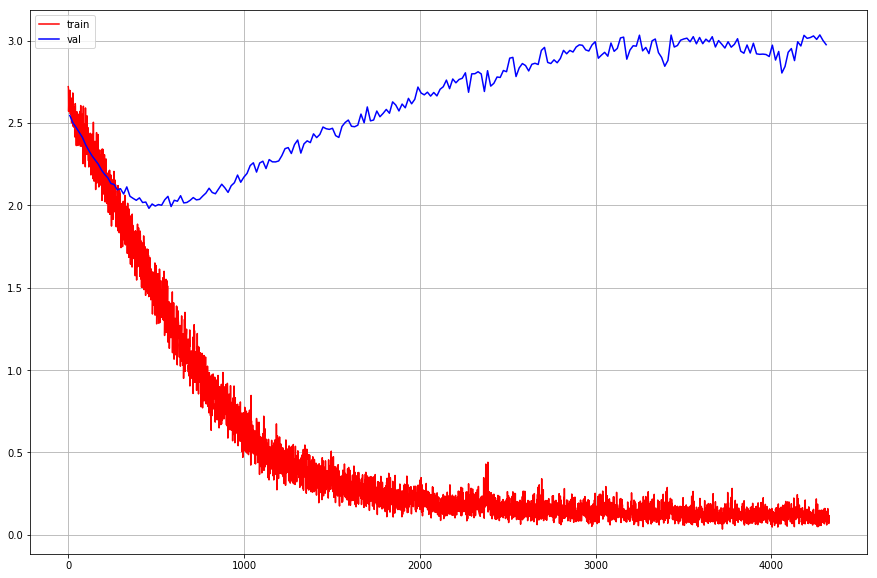

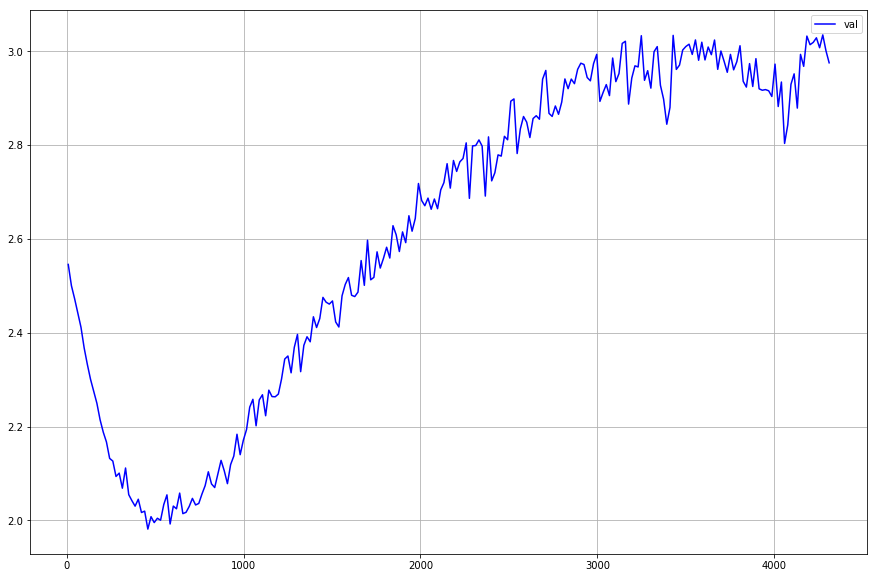

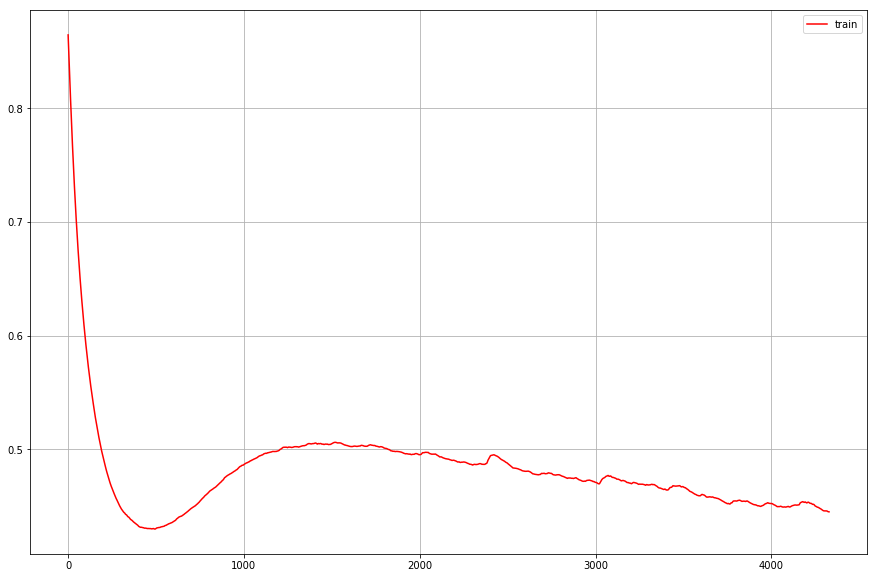

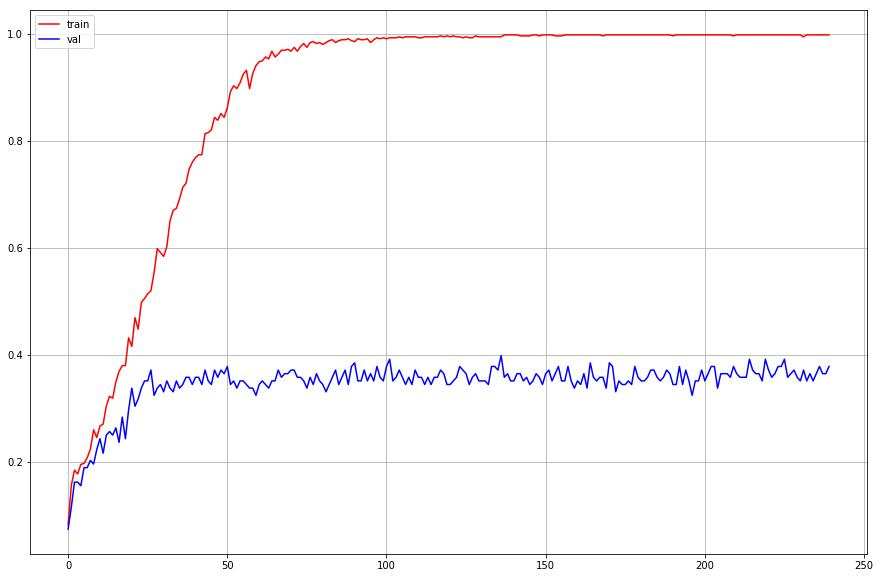

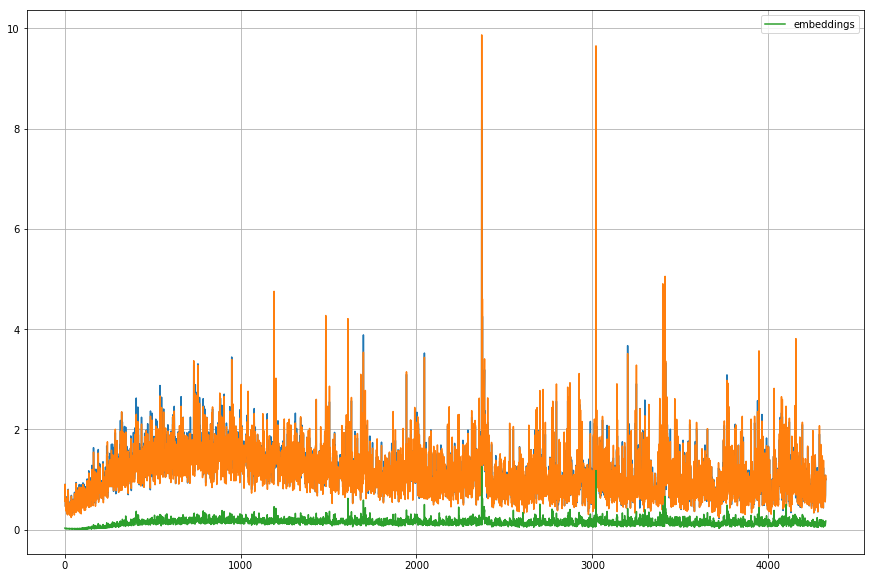

Epoch took  92.4451014995575
tensor([[-3.1333e+00,  1.5819e+00, -1.7818e+00,  5.7705e+00, -8.4958e-01,
          1.1237e+01, -4.2920e+00, -4.1632e+00,  5.6043e-01, -1.0736e+00,
         -1.4113e-02, -3.4392e+00, -2.5264e+00],
        [-7.9696e-01, -2.0224e-01,  2.0635e+00, -1.3922e+00, -1.3295e+00,
         -1.7923e+00, -6.2181e-01,  4.7956e-01,  1.1394e+00, -2.2095e+00,
          1.7479e+00, -4.2008e+00,  7.9762e+00],
        [ 7.3123e-01, -1.9110e+00,  2.5664e-01,  6.7125e-01, -2.8381e+00,
          1.1759e+00, -2.7738e+00, -1.6174e+00,  1.2183e+01, -2.7391e-01,
         -3.1530e+00, -4.7965e+00, -7.9636e-01],
        [ 1.0975e+00,  9.5193e+00, -1.6927e-01, -2.3613e+00,  2.2605e-01,
         -1.3822e-01, -2.9448e+00,  1.5612e+00, -3.8804e+00, -2.2866e+00,
         -8.6065e-01,  1.7854e+00, -1.1049e-01],
        [ 1.7388e+00, -1.4976e-01,  2.0658e-01,  1.4737e+00, -3.0306e+00,
         -7.5396e-01, -1.0226e+00, -1.3154e+00,  5.8845e+00,  7.7237e-01,
         -2.1919e+00, -3.0077e+00, 

tensor([[ -1.0743,   7.5103,  -2.7804,   0.7142,   0.7494,   2.1087,
          -5.6283,  -1.3231,  -0.2149,  -0.5243,   0.0794,  -0.1689,
           0.2643],
        [  0.5877,  -0.9764,  -0.9688,   0.5614,  -1.0543,  -2.5444,
           8.8057,   2.5545,   0.7212,  -0.4354,  -1.0442,  -4.2004,
          -0.8631],
        [  2.5988,   7.3414,  -2.0000,  -4.6255,   3.3169,   3.0540,
          -2.8301,   0.4881,  -1.1820,  -1.0362,  -4.9237,   1.1116,
           0.0702],
        [  3.1447,  -0.5467,   6.8904,  -0.4609,  -4.0203,  -0.2756,
          -4.1024,  -4.2225,   0.4347,   2.6441,  -4.5175,   2.5473,
           0.6647],
        [ -1.5019,  -2.4596,  11.0607,  -0.8150,  -5.0618,   0.5282,
          -4.9660,  -4.3244,  -0.6618,   3.7722,   1.1626,   3.7283,
          -2.9028],
        [  7.4796,  -1.3268,  -0.4872,  -2.3718,  -2.8514,   0.0889,
          -2.7169,  -3.8285,   0.8970,   3.4128,  -3.5031,   3.0160,
          -0.7937],
        [  0.2469,  -4.5259,   8.5525,   2.1002,  -4

tensor([  1,   6,   1,   2,   2,   0,   2,   8,   5,   7,  11,   3,
         10,   1,   9,   3,   1,   1,  11,   3,   0,  11,   4,  12,
          7,   6,  12,   3,   3,   0,   8,   5,  11,   8,  12,   0,
          8,   4,  12,   5,   3,   4,   6,   3,   7,   1,   3,   2,
          5,   3,   8,   8,   8,  11,   5,   3,  11,   8,   3,   9,
          3,   9,   5,   8])
tensor([[ 8.4924e+00,  1.7102e+00, -5.1205e-01, -2.5949e+00, -2.2498e+00,
          3.1350e-01, -4.9465e+00, -2.6300e+00, -1.0424e+00,  1.4658e+00,
          2.3170e-01,  7.1212e-02,  1.6235e-01],
        [ 6.1128e-01,  1.5116e+00, -9.6839e-01, -3.4756e-01, -5.1700e+00,
          1.8309e+00, -4.8040e+00, -4.2234e+00, -1.7145e+00,  9.8672e+00,
          1.8628e+00,  3.9254e+00, -4.4575e+00],
        [ 1.1636e+00,  3.7290e+00, -2.4419e+00, -3.3807e-01, -2.1259e+00,
          1.0536e+01, -4.9579e+00,  1.1151e-01, -1.5051e+00, -4.1407e-01,
         -1.3570e+00,  1.3119e+00, -4.4052e+00],
        [ 1.6209e+00, -4.8695e-01, -3.77

tensor([  0,   9,   5,   6,   2,   5,  12,   4,   7,   5,   4,   2,
          7,   7,   9,   2,   3,  11,   3,   1,   7,   3,  11,  12,
          8,   3,   3,   7,  10,   9,   0,   3,   6,   7,   4,   2,
         12,  11,   9,   3,   3,   9,   7,   3,   5,   6,  11,   2,
          9,   2,   3,   0,  12,   2,   7,   4,   4,   7,   3,   6,
          1,   2,  10,   8])
tensor([[-2.2102e+00,  1.5170e+00, -2.9937e+00,  9.9834e-01,  6.8898e+00,
         -2.3066e+00, -3.3488e+00,  1.8526e+00,  4.4238e-01,  3.3133e+00,
         -3.4223e+00,  6.3232e-02, -2.6084e+00],
        [-1.5049e-01,  1.2631e+00,  8.5665e+00, -3.1821e-04, -4.8964e+00,
         -2.3445e+00, -4.9826e+00, -4.5953e+00, -3.2362e+00,  9.8998e-01,
          2.5807e+00,  4.1085e+00,  1.6770e+00],
        [-1.7653e+00, -2.2444e+00, -1.7790e+00,  2.5576e+00, -4.5321e+00,
         -5.9855e-01, -2.9055e+00, -1.5909e+00, -6.6422e-01,  1.1580e+00,
          9.3118e+00, -1.6967e+00,  3.5300e+00],
        [ 1.4871e+00, -4.2354e-01, -2.32

tensor([  4,   2,  10,   5,  11,   5,   9,  12,   7,  12,   0,  11,
          8,   4,   1,   6,   1,  11,   5,   0,   1,  11,   6,   7,
          2,   2,  11,   8,   3,   8,   9,   0,   6,   6,   3,   5,
          6,   3,   5,   0,   0,   8,   6,  12,  12,   1,  12,   3,
          7,   2,   3,   9,   9,   8,  12,   5,  12,   6,   3,  10,
          9,   1,   2,  10])
tensor([[ -1.0323,   2.5232,   9.3878,   0.0154,  -3.5285,   0.1501,
          -4.4299,  -5.5048,  -0.8108,  -3.1247,   0.8372,   2.1901,
           2.2802],
        [  8.9859,   1.4077,   0.5489,  -2.1643,  -3.5080,   1.0970,
          -2.8496,  -1.7330,  -3.1724,  -1.4170,  -1.6270,   1.7157,
           1.2330],
        [  3.1683,   0.3449,   7.9966,  -1.4152,  -3.5484,  -2.0105,
          -3.7597,  -5.0326,  -0.8461,  -0.0056,  -1.1900,   2.4027,
           2.3151],
        [  0.9376,  -1.6760,   1.2858,   2.6972,  -2.9502,  -0.8172,
          -3.1699,  -5.4344,  -3.1574,  -2.0875,   3.2566,   1.9243,
           8.0798],

tensor([  2,   0,   2,  12,   8,   9,   2,   8,   0,   4,   7,   6,
          8,  11,   8,   4,   3,   1,   1,  11,   2,   8,  10,   4,
          7,   4,   0,   6,   0,   0,   5,   9,   2,   3,   9,   0,
         10,   1,   4,   8,   3,   6,  10,  10,   8,   8,   0,   2,
          0,  11,  10,   5,   6,   8,  12,   5,   9,  12,   2,  11,
          1,   1,   7,   4])
tensor([[  6.4464,   1.1706,   0.1316,   0.5153,  -1.2073,  -1.5451,
          -5.4973,  -2.8200,   2.0681,   1.6571,   0.5387,  -2.6781,
          -1.8023],
        [  0.6866,  -1.0830,   2.8250,  -2.5630,  -4.0538,   1.3478,
          -5.5989,  -5.5641,  -1.2481,   4.5397,  -1.7359,  10.5364,
          -0.7825],
        [  4.7107,   0.9544,   1.1306,  -0.1991,  -0.8402,  -3.0221,
           0.2905,   0.6527,  -0.7058,   2.4153,  -1.8036,  -3.0916,
          -2.0470],
        [ -0.1807,  -0.6444,   0.1008,   1.0636,  -1.2924,  -2.9943,
           8.4252,   2.0074,   1.1237,  -0.0951,  -1.1107,  -4.3908,
          -0.9721],

tensor([  0,  11,   0,   6,  11,   1,   5,   9,  11,  11,   7,  12,
         10,   0,   5,  10,   6,   9,   5,   9,   0,   0,   6,   3,
         11,  11,   4,   8,   0,   0,   8,   8,   2,  10,  10,   3,
         12,   8,   2,   9,   5,   6,   0,   7,   8,   0,   7,   2,
          7,   1,  12,   4,   2,   0,   9,  12,   1,   6,   4,  11,
          9,   0,   7,  12])
tensor([[  0.9300,  -0.2899,  -2.2825,  -2.0385,   0.6689,   5.8649,
          -5.3535,   0.2781,  -0.3024,   1.8777,  -0.2453,   2.2306,
          -2.7660],
        [  0.6472,  -1.9098,   0.7994,   1.6953,   0.9650,  -0.4587,
          -2.2987,  -1.5039,   1.0998,   5.5248,  -2.3727,   0.3841,
          -4.7693],
        [  2.4441,   0.3699,   0.1842,  -1.1170,  -3.5704,   1.5872,
          -4.3853,  -3.4355,  -1.5512,   1.2830,  -1.4646,   8.1986,
           0.0055],
        [  1.3635,   2.4075,  -0.9847,  -2.5949,   2.4516,   2.3363,
          -4.6706,   7.4785,  -2.5589,  -0.7978,  -1.1690,  -0.0549,
          -2.8572],

tensor([  5,   9,  11,   7,   0,   7,   3,   1,  12,   6,  11,  12,
          1,   3,   1,   3,   8,   7,   3,   6,   9,  12,   8,   9,
         12,   8,  12,  11,   7,   3,   3,   9,   2,   8,   5,   0,
          5,   2,  11,  11,   5,  11,   1,   7,   5,  12,  10,   3,
          2,   8,   6,   2,   1,  11,   2,   5,   0,  10,   3,   5,
          6,  10,   7,   7])
tensor([[  0.7141,  -0.7067,  -0.0398,   1.0209,  -1.2701,  -3.4498,
           8.8327,   1.0132,   0.8742,  -0.0182,  -0.9315,  -4.4227,
          -0.4746],
        [ -0.3764,   0.0538,  -1.4340,  -1.7982,   3.4125,   0.0390,
          -1.6160,  10.1678,  -1.9494,   1.4133,  -1.6134,  -2.7348,
          -3.8964],
        [  1.6839,   0.9384,   7.9121,  -0.7021,  -1.3681,   0.7538,
          -6.2436,  -2.4283,   2.5530,  -0.2175,  -0.3266,  -1.3028,
          -3.6017],
        [  2.5406,  -0.5332,   1.1619,   0.8841,  -2.9043,  -0.4777,
          -3.2832,  -6.9065,  -0.1047,   2.0895,  -4.4347,   8.5787,
           0.4703],

tensor([  6,   7,   2,  11,   6,   5,   5,   3,   9,   2,   9,   1,
          1,   8,   7,   5,   4,   9,   6,   5,   2,   8,   6,  12,
          4,   8,   5,   1,  11,   5,   6,   8,  12,   2,   9,   3,
          5,   3,   0,   1,   2,  12,   0,   6,  11,   8,  10,   9,
          5,   4,   3,   0,   0,   8,  10,   1,   1,  12,   1,  10,
          4,   3,   1,  11])


KeyboardInterrupt: 

In [24]:
trainer.train(batch_sampler, {"n_epochs":800})

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
def build_confusion_matrix(predicted_probs, true):
    n_labels = predicted_probs.shape[1]
#     assert true_y.shape == predicted_probs.shape
    result = np.zeros(shape=(n_labels, n_labels))
    
    pred = predicted_probs.argmax(axis=1)
    
#     print(pred)
#     print(true)
#     print(len(true))
    
    accuracy = np.count_nonzero(pred == true.ravel())/len(true)
    print("Accuracy = ", accuracy)
#     true = true_y.argmax(axis=1)
    
    for pred_cls in range(n_labels):
        for true_cls in range(n_labels):
            result[true_cls, pred_cls] = np.count_nonzero(true[pred == pred_cls] == true_cls)
    norm = result.sum(axis=1)
    norm = np.maximum(norm, 1)
#     result /= norm[:, None]
    return result

def plot_confusion_matrix(confusion_matrix):
    fig = plt.figure( figsize=(20, 20))
    plt.xlabel("True classes")
    plt.ylabel("Predicted classes")
#     sns.heatmap(confusion_matrix, annot=True, vmin=0.0, vmax=1.0, cmap="YlGnBu")
    sns.heatmap(confusion_matrix, annot=True, vmin=0.0, cmap="YlGnBu")

In [26]:
import gc
gc.collect()

0

In [27]:
cls.eval()
x, y = batch_sampler.x_train, batch_sampler.y_train
pred = torch.nn.functional.softmax(cls.forward(x), dim=1)

Accuracy =  1.0


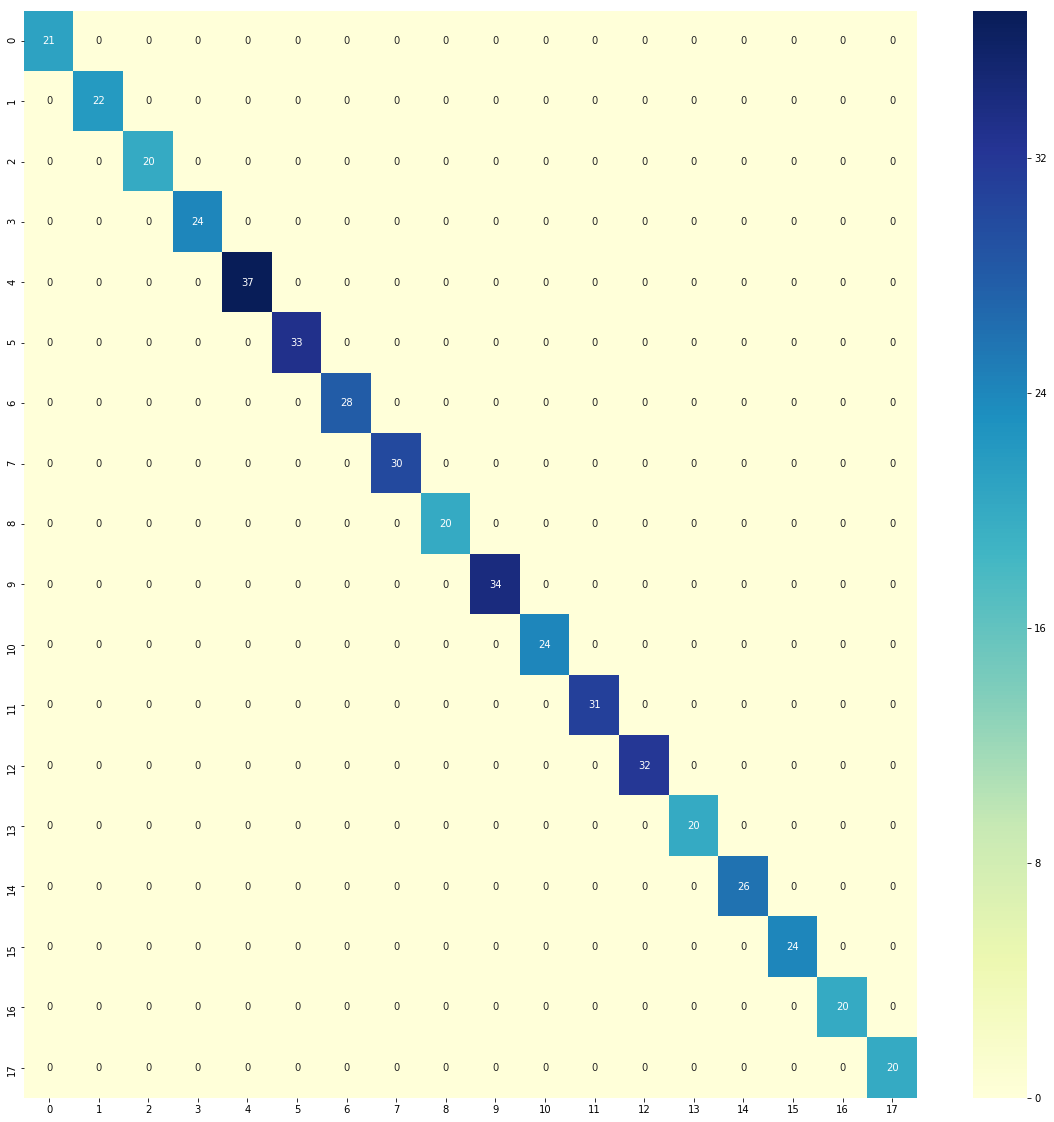

In [28]:
plot_confusion_matrix(build_confusion_matrix(pred.detach().numpy(), y.reshape(-1, 1)))

In [29]:
#cls.eval()
x, y = batch_sampler.x_test, batch_sampler.y_test
pred = torch.nn.functional.softmax(cls.forward(x), dim=1)

Accuracy =  0.8852459016393442


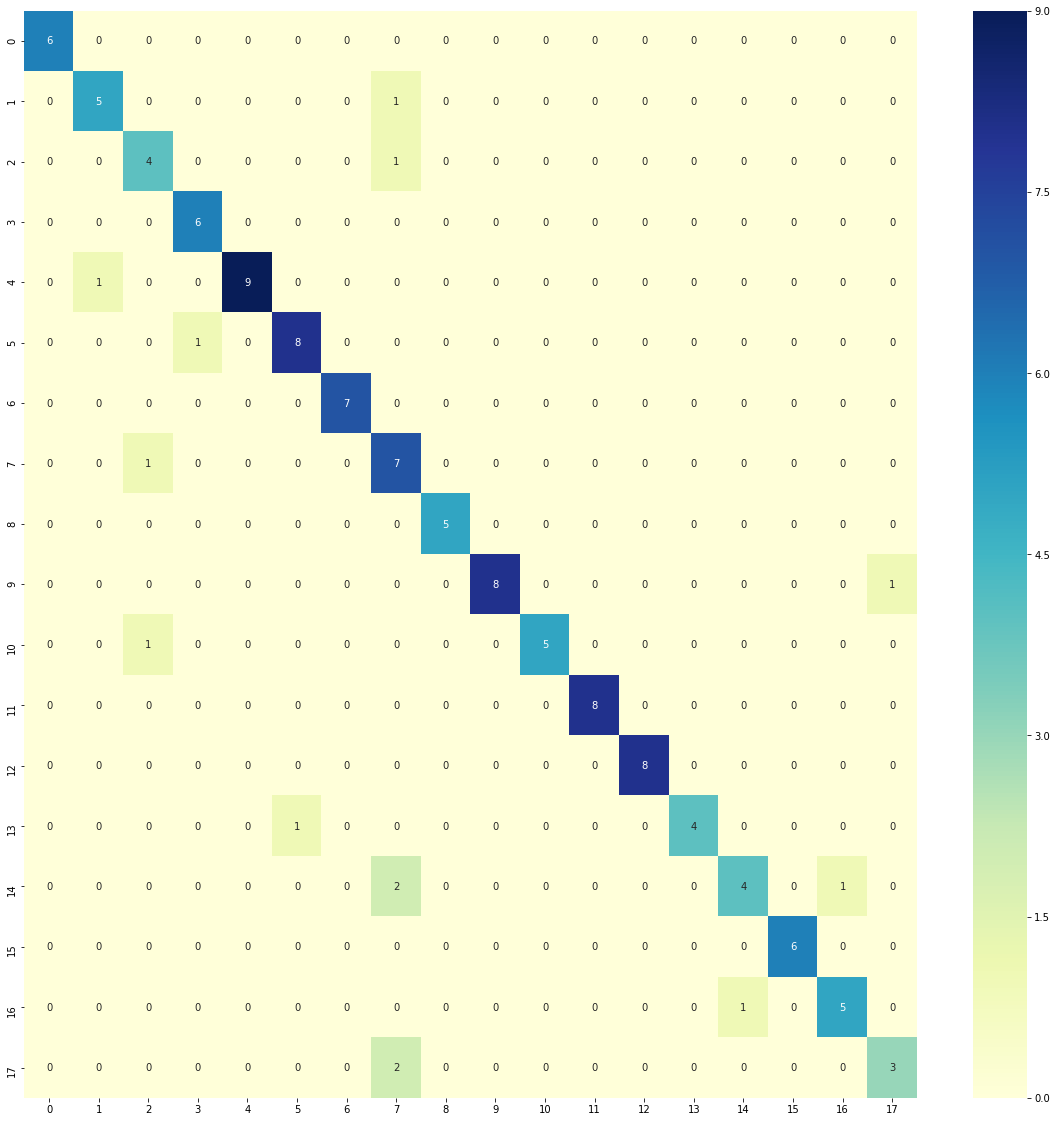

In [30]:
plot_confusion_matrix(build_confusion_matrix(pred.detach().numpy(), y.reshape(-1, 1)))

In [31]:
from sklearn.decomposition import PCA
import matplotlib.cm as cm
n_classes = batch_sampler.get_n_classes()
# colors = {0:'r', 1:'g', 2:'b', 3:'c', 4:'y
colors = {i:c for i, c in enumerate(cm.rainbow(np.linspace(0, 1, n_classes)))}
pca = PCA(n_components=2)
x_transformed = cls.transform_batch(batch_sampler.x_train)
x_test_transformed = cls.transform_batch(batch_sampler.x_test)
pca.fit(x_transformed.detach())
def plot_pca(x, y, alpha=1.0):
    plt.figure(figsize=(20, 20))
    plt.scatter(x[:, 0], x[:, 1], color=list(map(colors.get, y)), alpha=alpha)
    plt.show()

<Figure size 1440x1440 with 0 Axes>

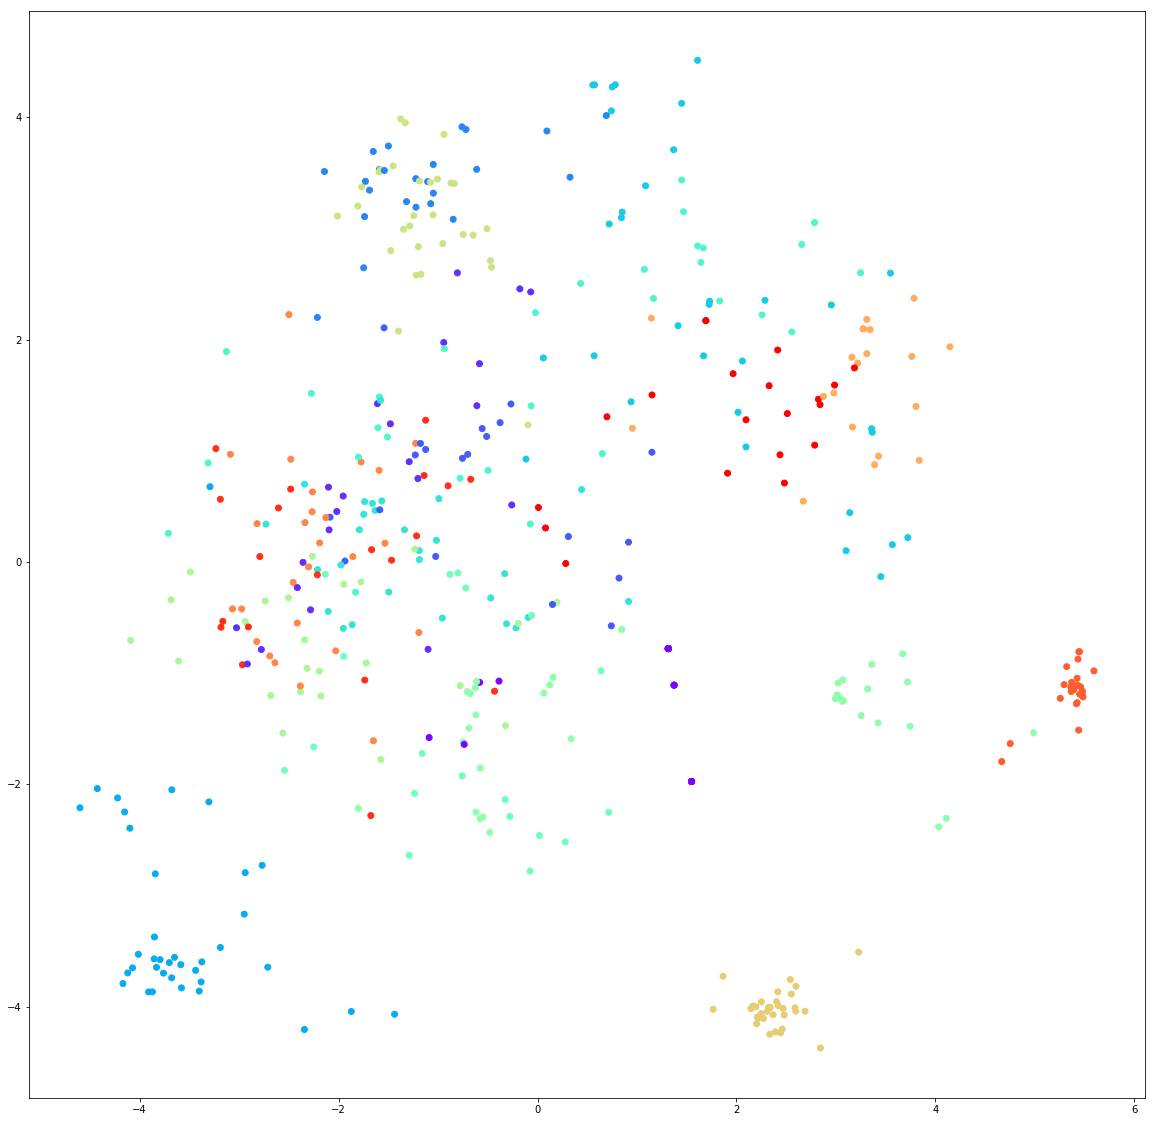

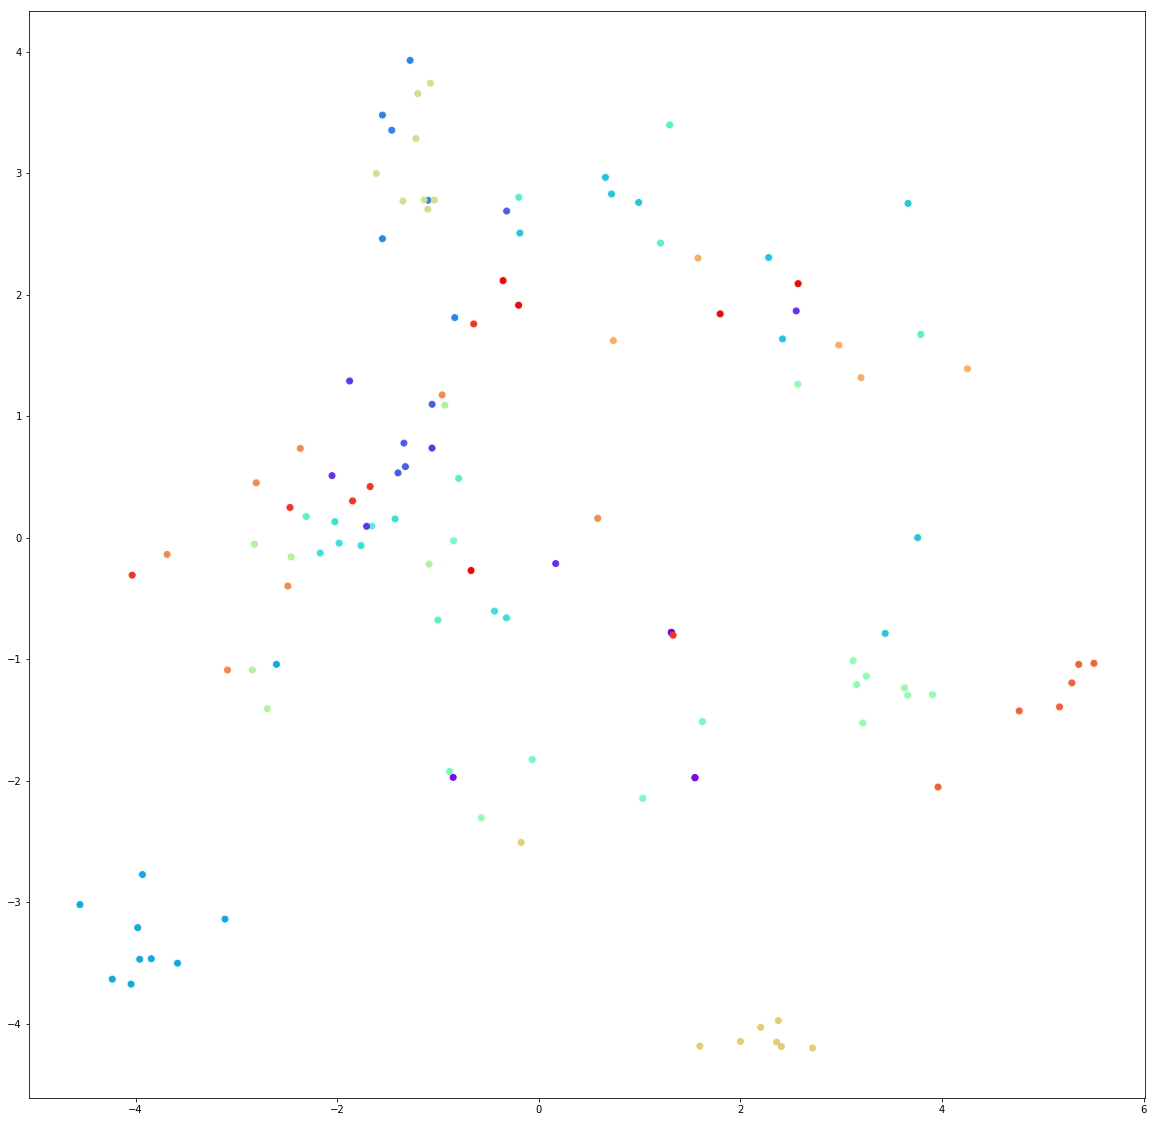

In [32]:
plt.figure(figsize=(20, 20))
plot_pca(pca.transform(x_transformed.detach()), batch_sampler.y_train, alpha=1.0)
plot_pca(pca.transform(x_test_transformed.detach()), batch_sampler.y_test, alpha=1.0)
# plt.show()